In [1]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#nacitanie datasetu a uprava null hodnot
weather = pd.read_excel('weatherAUS.xlsx')
weather = weather.fillna(value='0')

In [3]:
weather.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,0,0,W,44,W,...,22,1007.7,1007.1,8,0,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0,0,0,WNW,44,NNW,...,25,1010.6,1007.8,0,0,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0,0,0,WSW,46,W,...,30,1007.6,1008.7,0,2,21,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28,0,0,0,NE,24,SE,...,16,1017.6,1012.8,0,0,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1,0,0,W,41,ENE,...,33,1010.8,1006,7,8,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,0,0,WNW,56,W,...,23,1009.2,1005.4,0,0,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25,0,0,0,W,50,SW,...,19,1009.6,1008.2,1,0,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0,0,0,W,35,SSE,...,19,1013.4,1010.1,0,0,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0,0,0,NNW,80,SE,...,9,1008.9,1003.6,0,0,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,0,0,W,28,S,...,27,1007,1005.7,0,0,20.1,28.2,Yes,0.0,No


In [4]:
#uprava datasetu
data = weather[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'RISK_MM']]
data['RainTomorrow'] = np.where((weather['RainTomorrow']) == 'Yes', 1, 0)
data

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,44,0.0,0
1,7.4,25.1,0,44,0.0,0
2,12.9,25.7,0,46,0.0,0
3,9.2,28,0,24,1.0,0
4,17.5,32.3,1,41,0.2,0
5,14.6,29.7,0.2,56,0.0,0
6,14.3,25,0,50,0.0,0
7,7.7,26.7,0,35,0.0,0
8,9.7,31.9,0,80,1.4,1
9,13.1,30.1,1.4,28,0.0,0


In [5]:
#rozdelenie datasetu
X = data[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'RISK_MM']]
y = data['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
kategoricka_premenna = np_utils.to_categorical(y_train)

In [7]:
#trenovanie siete
model = Sequential()
model.add(Dense(30, input_dim=5, activation='sigmoid'))
model.add(Dense(15, activation='relu'))
model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [8]:
#vypis chyby
chyba = model.fit(X_train,kategoricka_premenna, epochs=10)

Epoch 1/10
113754/113754 [==============================] - 6s 53us/step - loss: 0.0529 - acc: 0.9387
Epoch 2/10
113754/113754 [==============================] - 6s 51us/step - loss: 0.0164 - acc: 0.9859
Epoch 3/10
113754/113754 [==============================] - 6s 51us/step - loss: 0.0130 - acc: 0.9911
Epoch 4/10
113754/113754 [==============================] - 7s 60us/step - loss: 0.0114 - acc: 0.9932
Epoch 5/10
113754/113754 [==============================] - 7s 60us/step - loss: 0.0105 - acc: 0.9937
Epoch 6/10
113754/113754 [==============================] - 9s 80us/step - loss: 0.0099 - acc: 0.9940
Epoch 7/10
113754/113754 [==============================] - 7s 58us/step - loss: 0.0093 - acc: 0.9941
Epoch 8/10
113754/113754 [==============================] - 7s 58us/step - loss: 0.0089 - acc: 0.9943
Epoch 9/10
113754/113754 [==============================] - 6s 57us/step - loss: 0.0085 - acc: 0.9945
Epoch 10/10
113754/113754 [==============================] - 6s 52us/step - loss: 

In [9]:
#evaluacia modelu
scores = model.evaluate(X_train, kategoricka_premenna)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

113754/113754 [==============================] - 4s 31us/step

Accuracy: 99.85%


In [10]:
#porovnanie dat
confusion_matrix(y_test, model.predict_classes(X_test))

array([[22043,     7],
       [   30,  6359]])

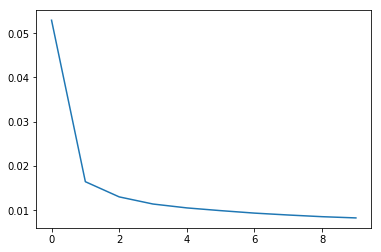

In [11]:
#zobrazenie poklesu chyby pomocou grafu
plt.plot(chyba.history['loss'])
plt.show()